MNIST Classification Model

In [51]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

Loading the MNIST data set into training and testing data sets

In [29]:
assert x_train.shape == (60000, 28, 28)  #28 x 28
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

x should be the feature
y should be the label
I'm using a training dataset of 60000, and a tesing dataset of 10000

5


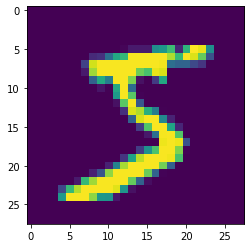

In [34]:
plt.imshow(x_train[0])
print(y_train[0])

As you can see, x_train[0] is a drawing of a 5, the corresponding y_train[0] is a 5

In [45]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

This changes the scale of the array values to in between 0 and 1 
This is supposed to improve the performance of the model 

In [48]:
model = tf.keras.models.Sequential() # Creating a sequential model
model.add(tf.keras.layers.Flatten()) # converting our images from multi-dimensional arrays into flat ones
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 128 neurons
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 128 neurons
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # 10  outputs, range over the numbers up to 10

model.compile(optimizer ='adam', loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2624 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1069 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0707 - accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0535 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0403 - accuracy: 0.9869


this trains the model

In [50]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9751
0.09417515248060226 0.9750999808311462


by using the testing data set, we can test the accuracy and loss of our model 

7


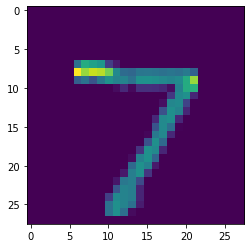

In [60]:
print(np.argmax(predictions[0]))
plt.imshow(x_test[0])
plt.show()

As you can see, the model predicted a seven